In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
def pandemic(k,t):
    
    S_H = k[0]
    S_M = k[1]
    S_L = k[2]
    I_H = k[3]
    I_M = k[4]
    I_L = k[5]  
    R_H = k[6]
    R_M = k[7]
    R_L = k[8]
    
    dS_Hdt = -ps['beta_H'] * (I_H + ps['alpha'] * I_M + ps['alpha'] * I_L) * S_H +  ps['eta_MH'] * S_M
    dS_Mdt = -ps['beta_M'] * (ps['alpha'] * I_H + I_M + ps['alpha'] * I_L) * S_M -  ps['eta_MH'] * S_M +  ps['eta_LM'] * S_L  
    dS_Ldt = -ps['beta_L'] * (ps['alpha'] * I_H + ps['alpha'] * I_M + I_L) * S_L -  ps['eta_LM'] * S_L
    
    dI_Hdt =  ps['beta_H'] * (I_H + ps['alpha'] * I_M + ps['alpha'] * I_L) * S_H - ps['gamma_H'] * I_H 
    dI_Mdt =  ps['beta_M'] * (ps['alpha'] * I_H + I_M + ps['alpha'] * I_L) * S_M - ps['gamma_M'] * I_M 
    dI_Ldt =  ps['beta_L'] * (ps['alpha'] * I_H + ps['alpha'] * I_M + I_L) * S_L - ps['gamma_L'] * I_L 
    
    dR_Hdt =  ps['gamma_H'] * I_H 
    dR_Mdt =  ps['gamma_M'] * I_M 
    dR_Ldt =  ps['gamma_L'] * I_L 
    
    
    return [dS_Hdt, dS_Mdt, dS_Ldt, dI_Hdt, dI_Mdt, dI_Ldt, dR_Hdt, dR_Mdt, dR_Ldt]

In [3]:
def RDS(x, y, z): #root diff squared
    return np.sqrt((y - x) ** 2 + (z - y) ** 2 + (x - z) ** 2)

In [4]:
#t range and time step
stp = 0.1
t = np.arange(0,80, stp)

In [5]:
#groups
S_colors = ['r-','y-','b-']
I_colors = ['r--','y--','b--']
groups = ['high risk', 'medium risk', 'low risk']

(800, 3)


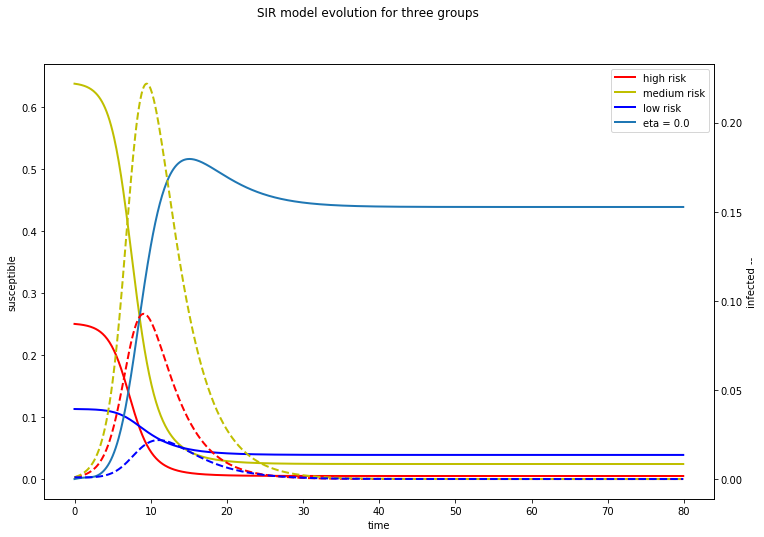

In [26]:
#fig configuration
%matplotlib inline

fig, ax = plt.subplots(1, figsize = (12,8))
ax2 = ax.twinx()
ax.set_xlabel('time')
ax.set_ylabel('susceptible')
ax2.set_ylabel('infected --')
fig.suptitle('SIR model evolution for three groups')

#initial conditions 

e = 0.
b = 2
g = 0.3
pop_tot = 1.16 + 2.57 + 6.55
k0 = [2.57/pop_tot, 6.55/pop_tot, 1.16/pop_tot, 0.001, 0.001, 0.001, 0, 0, 0]               #[high, med, low] 

ps = {'beta_H'  : b ,  'beta_M' : 38/60 * b ,'beta_L' : 19/60 * b,       #Infection rate
      'gamma_H' : g, 'gamma_M' : g,'gamma_L' : g, # death and recovery rate
      'alpha'   : 0.5,                                            #isolation parameter
      'eta_MH'  : e, 'eta_LM' : e}                                #interchage rate

#Solving initial conditions
#t = np.arange(0,50, stp)
k = odeint(pandemic,k0,t)
S = k[:,:3]
I = k[:,3:6]
R = k[:,6:]
print(R.shape)
#plotting

for i in range(3):
    ax.plot(t,S[:,i], S_colors[i], linewidth=2.0, alpha = 1, label = groups[i])
    ax2.plot(t,I[:,i], I_colors[i], linewidth=2.0, alpha = 1)
rds = RDS((R[:,0])/S[0,0] , (R[:,1])/S[0,1], (R[:,2])/S[0,2])
ax.plot(t[:], rds[:] , label = 'eta = {}'.format(e) , linewidth=2.0, alpha = 1)

ax.legend()



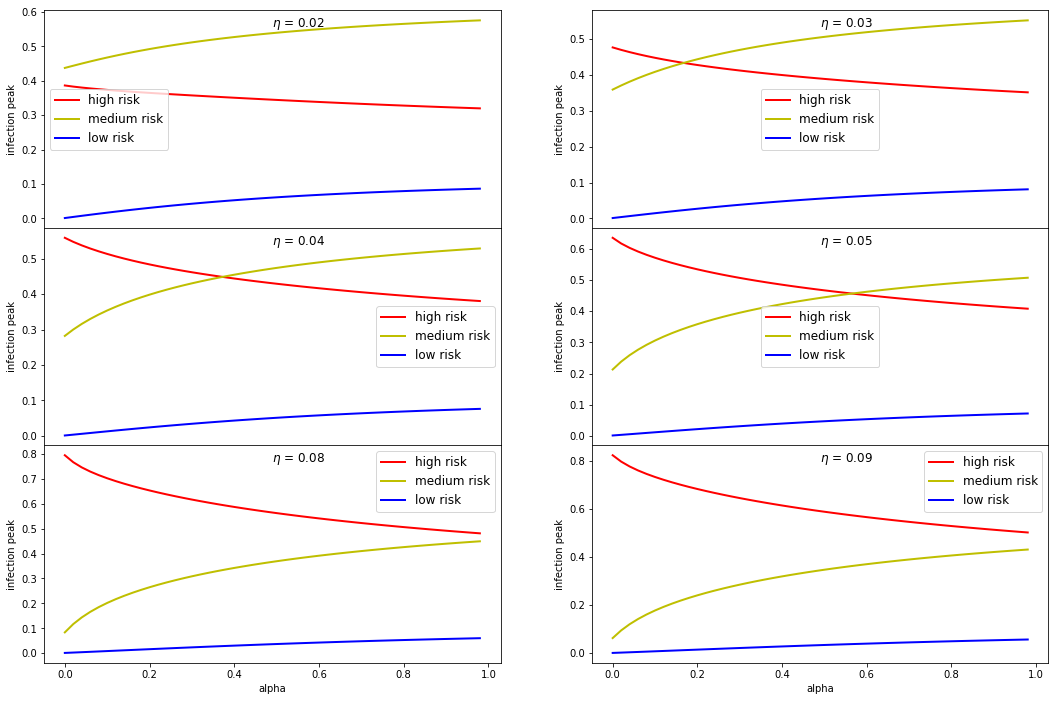

In [8]:
#fig configuration
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (18,12))
axs = [(ax1, ax2), (ax3, ax4), (ax5, ax6)]
#fig.suptitle('Infection peak vs alpha for various $\eta$\'s')

alphas = np.arange(0,1,0.02)
etas = [[0.02, 0.03], [0.04, 0.05], [0.08, 0.09]]
stp = 0.1
t = np.arange(0,100, stp)
time_array = np.array([t,t,t]).T

I_max_array = np.zeros((len(alphas),3))
S_init = np.zeros((len(alphas),3))
t_max_array = np.zeros((len(alphas),3))
R_final_array = np.zeros((len(alphas),3))
fig.subplots_adjust(hspace=0)

for ax_ind1 in range(3): # each ax for different eta
    for ax_ind2 in range(2):
        ax = axs[ax_ind1][ax_ind2]
        e = etas[ax_ind1][ax_ind2]
        ps['eta_MH'] = e
        ps['eta_LM'] = e 
        i = 0
        for a in alphas: #we want to solve the equation for various values of alpha
            ps['alpha'] = a
            #Solving initial conditions
            k = odeint(pandemic,k0,t)
            S = k[:,:3]
            I = k[:,3:6]
            R = k[:,6:]
            #I_max_array[i] = np.max(I[:,:], axis = 0)
            #S_init[i] = S[0,:] 
            R_final_array[i] = R[-1,:]
            #t_max_array[i] = time_array[I[:,:] == I_max_array[i]]
            i += 1

        #plotting
        for j in range(3): #plotting for 3 different groups. ax[0] is for I_peak (left) and ax[1] is for t_peak (right)
            ax.plot(alphas[:], R_final_array[:,j] , S_colors[j], linewidth=2.0, alpha = 1, label = groups[j])
        ax.set_xlabel('alpha')
        ax.set_ylabel('infection peak')
        ax.text(0.5, 0.9,'$\eta$ = {}'.format(e) , fontsize=12, va='bottom', transform=ax.transAxes)
        ax.legend(fontsize = 12)


In the following code, we want to plot the INFECTION PEAK and the respective TIME (at which the peak occurs), versus alpha. 

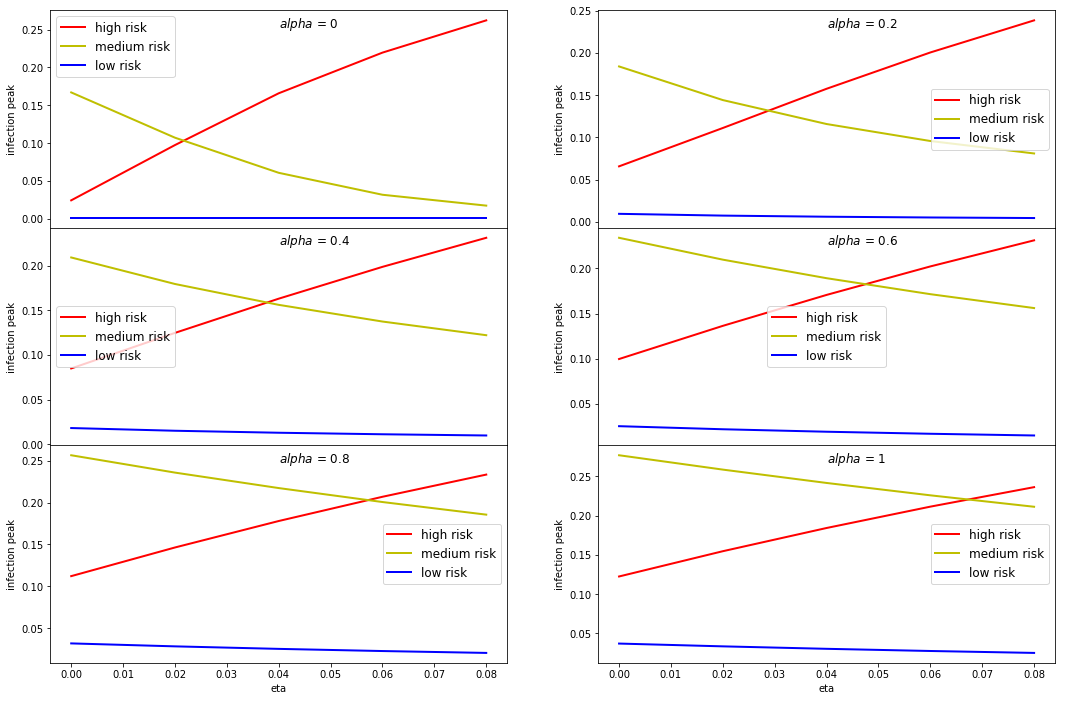

In [9]:
#fig configuration
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (18,12))
axs = [(ax1, ax2), (ax3, ax4), (ax5, ax6)]
#fig.suptitle('Infection peak vs eta for six $alpha$\'s')

alphas = [[0,0.2],[0.4,0.6], [0.8, 1]]
etas = np.arange(0,0.1, 0.02)
stp = 0.1
t = np.arange(0,100, stp)
time_array = np.array([t,t,t]).T

I_max_array = np.zeros((len(etas),3))
S_init = np.zeros((len(etas),3))
t_max_array = np.zeros((len(etas),3))
R_final_array = np.zeros((len(etas),3))
fig.subplots_adjust(hspace=0)

for ax_ind1 in range(3): # each ax for different eta
    for ax_ind2 in range(2):
        ax = axs[ax_ind1][ax_ind2]
        a = alphas[ax_ind1][ax_ind2]
        ps['alpha'] = a
        i = 0
        for e in etas: #we want to solve the equation for various values of alpha
            ps['eta_MH'] = e
            ps['eta_LM'] = e
            #Solving initial conditions
            k = odeint(pandemic,k0,t)
            S = k[:,:3]
            I = k[:,3:6]
            R = k[:,6:]
            I_max_array[i] = np.max(I[:,:], axis = 0)
            S_init[i] = S[0,:]
            #R_final_array[i] = R[-1,:] #R[I[:,:] == I_max_array[i]] #
            #t_max_array[i] = time_array[I[:,:] == I_max_array[i]]
            i += 1

        #plotting
        for j in range(3): #plotting for 3 different groups. ax[0] is for I_peak (left) and ax[1] is for t_peak (right)
            #ax.plot(etas[:],S_init[:,j], S_colors[j], linewidth=2.0, alpha = 1, label = groups[j])
            ax.plot(etas[:],I_max_array[:,j] , S_colors[j], linewidth=2.0, alpha = 1, label = groups[j])
           
        #ax.set_ylim(0,0.15)
        ax.set_xlabel('eta')
        ax.set_ylabel('infection peak')
        ax.text(0.5, 0.9,'$alpha$ = {}'.format(a) , fontsize=12, va='bottom', transform=ax.transAxes)
        ax.legend(fontsize = 12)


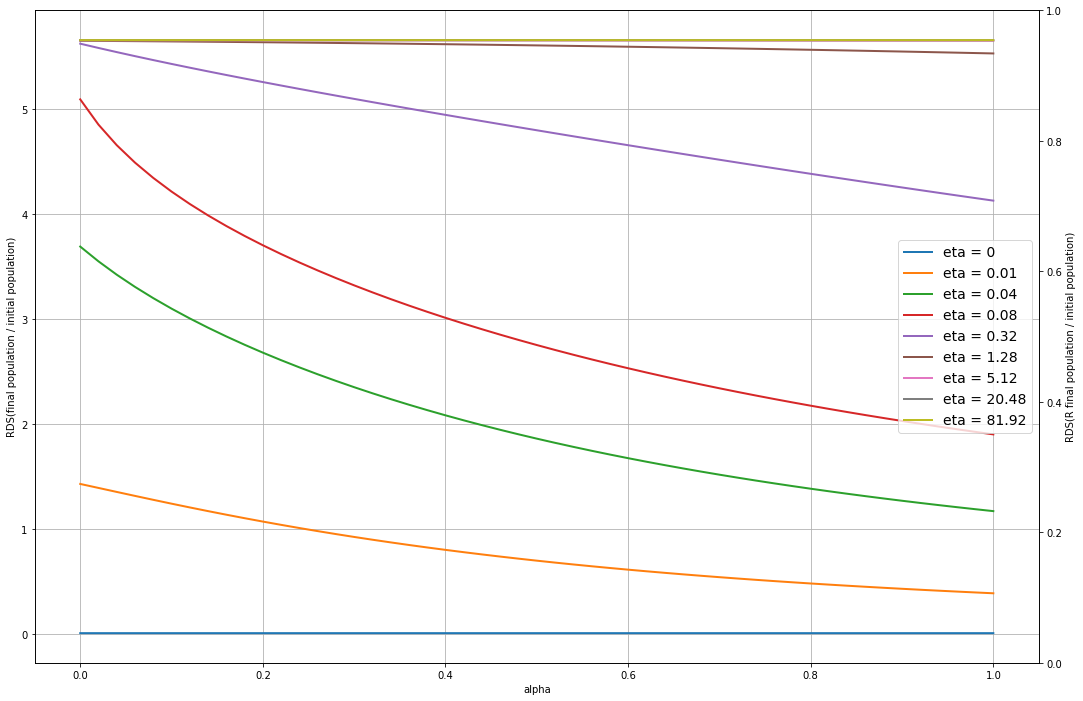

In [12]:
#fig configuration
fig, ax = plt.subplots(1,1, figsize = (18,12))
ax2 = ax.twinx()

alphas = np.arange(0,1.02,0.02)
etas = [[0, 0.01, 0.04], [0.08, 0.32, 1.28], [5.12, 20.48, 81.92]]

stp = 0.1
t = np.arange(0,100, stp)
time_array = np.array([t,t,t]).T

I_max_array = np.zeros((len(alphas),3))
S_init = np.zeros((len(alphas),3))
t_max_array = np.zeros((len(alphas),3))
R_final_array = np.zeros((len(alphas),3))
S_final_array = np.zeros((len(alphas),3))

ax.grid()
ax.set_xlabel('alpha')


for ax_ind1 in range(3): # each ax for different eta
    for ax_ind2 in range(3):
        e = etas[ax_ind1][ax_ind2]
        ps['eta_MH'] = e
        ps['eta_LM'] = e 
        i = 0
        for a in alphas: #we want to solve the equation for various values of alpha
            ps['alpha'] = a
            #Solving initial conditions
            
            k = odeint(pandemic,k0,t)
            S = k[:,:3]
            I = k[:,3:6]
            R = k[:,6:]
            
            #I_max_array[i] = np.max(I[:,:], axis = 0)
            S_init[i] = S[0,:]
            R_final_array[i] = R[-1,:]
            S_final_array[i] = S[-1,:]            
            i += 1
            
        #plotting
        pop_final_ratio = (S_final_array + R_final_array)/S_init
        rds_total_pop = RDS(pop_final_ratio[:,0] , pop_final_ratio[:,1], pop_final_ratio[:,2])
        #rds_S_final = RDS(S_final_array[:,0]/S_init[:,0] , S_final_array[:,1]/S_init[:,1], S_final_array[:,2]/S_init[:,2])
        ax.plot(alphas[:], rds_total_pop[:] , label = 'eta = {}'.format(e) , linewidth=2.0, alpha = 1)
        #ax2.plot(alphas[:], rds_R_final[:] , label = 'eta = {}'.format(e), dashes = [6,2],linewidth=2.0, alpha = 1)
       
ax.set_ylabel('RDS(final population / initial population)')
ax2.set_ylabel('RDS(R final population / initial population)')
ax.legend(fontsize = 14)


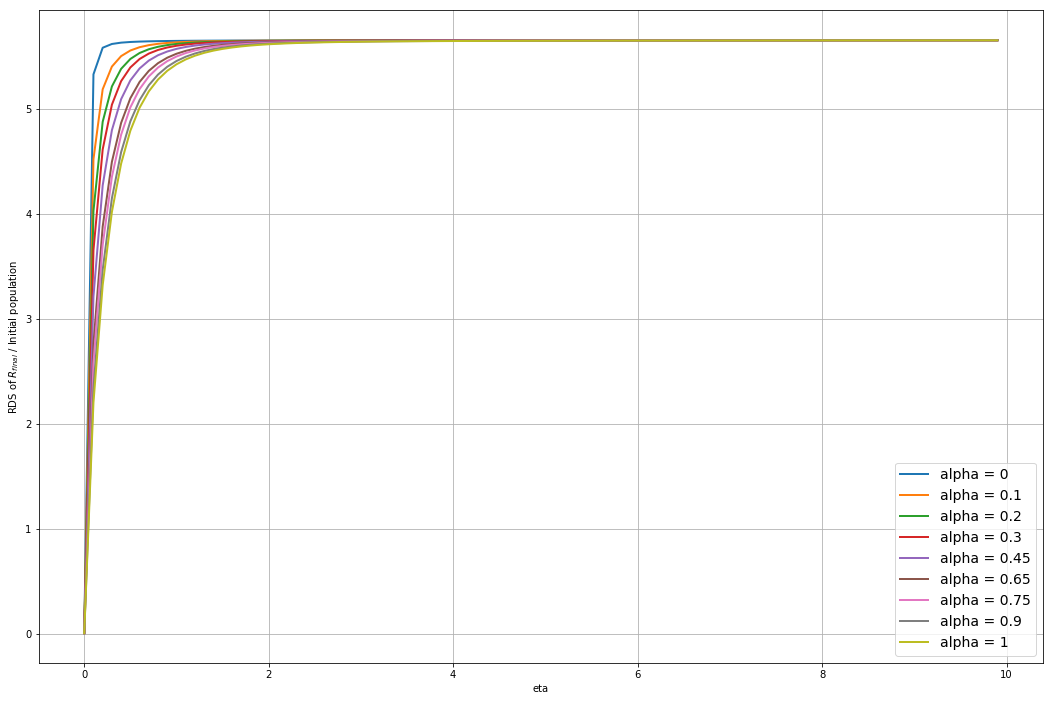

In [13]:
#fig configuration
fig, ax = plt.subplots(1,1, figsize = (18,12))
#fig.suptitle('Infection peak vs eta for various alpha\'s')

alphas = [[0, 0.1, 0.2], [0.3,0.45, 0.65], [0.75, 0.9, 1]]
etas = np.arange(0,10, 0.1)

stp = 0.1
t = np.arange(0,100, stp)
time_array = np.array([t,t,t]).T

I_max_array = np.zeros((len(etas),3))
S_init = np.zeros((len(etas),3))
t_max_array = np.zeros((len(etas),3))
R_final_array = np.zeros((len(etas),3))
S_final_array = np.zeros((len(etas),3))
ax.grid()
ax.set_xlabel('eta')


#ax.set_ylabel('$R_{f,H} - R_{f,M}$')
#ax.set_ylabel('RDS of $R_{final}$ \'s')
ax.set_ylabel('RDS of $R_{final}$ / Initial population')
#ax.set_ylabel('Energy of $R_{final}$ \'s')

for ax_ind1 in range(3): # each ax for different eta
    for ax_ind2 in range(3):
        a = alphas[ax_ind1][ax_ind2]
        ps['alpha'] = a
        i = 0
        for e in etas: #we want to solve the equation for various values of alpha
            ps['eta_MH'] = e
            ps['eta_LM'] = e
            #Solving initial conditions
            k = odeint(pandemic,k0,t)
            S = k[:,:3]
            I = k[:,3:6]
            R = k[:,6:]
            I_max_array[i] = np.max(I[:,:], axis = 0)
            S_init[i] = S[0,:]
            R_final_array[i] = R[-1,:] 
            S_final_array[i] = S[-1,:]    
            i += 1
        
        pop_final_ratio = (S_final_array + R_final_array)/S_init
        rds_total_pop = RDS(pop_final_ratio[:,0] , pop_final_ratio[:,1], pop_final_ratio[:,2])
        
        #plotting
        ax.plot(etas[:], rds_total_pop[:], linewidth=2.0, alpha = 1, label = 'alpha = {}'.format(a))
        
        

ax.legend(fontsize = 14)


Text(0,0.5,'R')

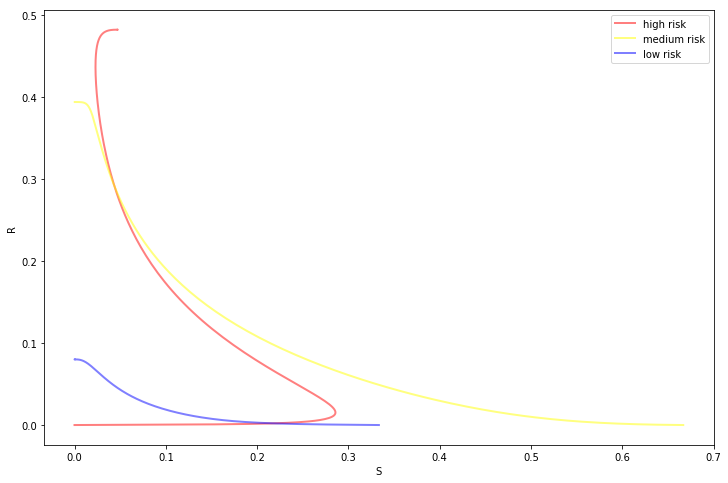

In [41]:
#fig configuration
fig, ax = plt.subplots(1, figsize = (12,8))

'''
this is plotted for constant total population
'''

#initial conditions 

e = 0.1
b = 2
g = 0.3
a = 0.5

pop_high = 1#2.57
pop_med  = 1#6.55
pop_low  = 1#1.16
pop_tot  =  pop_high + pop_med + pop_low

ps = {'beta_H'  : b ,  'beta_M' : 38/60 * b ,'beta_L' : 19/60 * b,       #Infection rate
      'gamma_H' : g, 'gamma_M' : g,'gamma_L' : g, # death and recovery rate
      'alpha'   : a,                                            #isolation parameter
      'eta_MH'  : e, 'eta_LM' : e}                                #interchage rate

#Solving initial conditions
pop_array = np.arange(0, pop_high, 1)

t = np.arange(0,400, stp)
for i in range(len(pop_array)):
    
    pop_high = pop_array[i]
    pop_med = pop_tot - pop_high - pop_low
    pop_tot =  pop_high + pop_med + pop_low
    
    k0 = [pop_high /pop_tot, pop_med/pop_tot, pop_low/pop_tot, 0.001, 0.001, 0.001, 0, 0, 0]   #[high, med, low] 
    k = odeint(pandemic,k0,t)
    S = k[:,:3]
    I = k[:,3:6]
    R = k[:,6:]
    
    #plotting
    ax.plot(S[:,0],R[:,0], linewidth=2.0, alpha = 0.5, color = 'r', label = 'high risk')
    ax.plot(S[:,1],R[:,1], linewidth=2.0, alpha = 0.5, color = 'yellow', label = 'medium risk')
    ax.plot(S[0:,2],R[0:,2], linewidth=2.0, alpha = 0.5, color = 'b', label = 'low risk')
    if i == 0:
        ax.legend()
        
ax.set_xlabel('S')
ax.set_ylabel('R') 

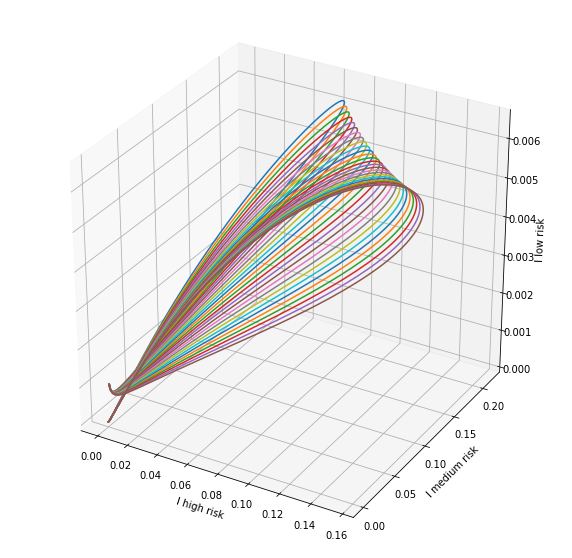

In [41]:
#fig configuration

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111 ,projection='3d')

ax.set_xlabel('I high risk')
ax.set_ylabel('I medium risk')
ax.set_zlabel('I low risk')

#initial conditions 

e = 0.04
b = 2
g = 0.3
a = 0.2

pop_high = 2.57
pop_med = 6.55
pop_low = 1.16
pop_tot =  pop_high + pop_med + pop_low

ps = {'beta_H'  : b ,  'beta_M' : 38/60 * b ,'beta_L' : 19/60 * b,       #Infection rate
      'gamma_H' : g, 'gamma_M' : g,'gamma_L' : g, # death and recovery rate
      'alpha'   : a,                                            #isolation parameter
      'eta_MH'  : e, 'eta_LM' : e}                                #interchage rate

#Solving initial conditions
pop_array = np.arange(0, pop_high, 0.1)

t = np.arange(0,100, stp)
for i in range(len(pop_array)):
    
    pop_high = pop_array[i]
    pop_med = pop_tot - pop_high - pop_low
    #pop_tot =  pop_high + pop_med + pop_low
    
    k0 = [pop_high /pop_tot, pop_med/pop_tot, pop_low/pop_tot, 0.001, 0.001, 0.001, 0, 0, 0]   #[high, med, low] 
    k = odeint(pandemic,k0,t)
    S = k[:,:3]
    I = k[:,3:6]
    R = k[:,6:]
    #plotting
    ax.plot(I[:,0],I[:,1],I[:,2],)

    

In [ ]:
#fig configuration
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (18,12))
axs = [(ax1, ax2), (ax3, ax4), (ax5, ax6)]
fig.suptitle('time peak vs alpha for six $\eta$\'s')

alphas = np.arange(0,1,0.02)
etas = [[0.00, 0.01], [0.02, 0.03], [0.04, 0.05]]
t = np.arange(0,50, stp)
time_array = np.array([t,t,t]).T

I_max_array = np.zeros((len(alphas),3))
t_max_array = np.zeros((len(alphas),3))
fig.subplots_adjust(hspace=0)

for ax_ind1 in range(3): # each ax for different eta
    for ax_ind2 in range(2):
        ax = axs[ax_ind1][ax_ind2]
        e = etas[ax_ind1][ax_ind2]
        ps['eta_MH'] = e
        ps['eta_ML'] = 0
        i = 0
        for a in alphas: #we want to solve the equation for various values of alpha
            ps['alpha'] = a
            #Solving initial conditions
            k = odeint(pandemic,k0,t)
            S = k[:,:3]
            I = k[:,3:6]
            R = k[:,6:]
            I_max_array[i] = np.max(I[:,:], axis = 0)
            t_max_array[i] = time_array[I[:,:] == I_max_array[i]]
            i += 1

        #plotting
        for j in range(3): #plotting for 3 different groups. ax[0] is for I_peak (left) and ax[1] is for t_peak (right)
            ax.plot(alphas[:],t_max_array[:,j], S_colors[j] ,linewidth=2.0, alpha = 1, label = groups[j])

        ax.set_xlabel('alpha')
        ax.set_ylabel('time peak')
        ax.text(0.5, 0.9,'$\eta$ = {}'.format(e) , fontsize=10, va='bottom', transform=ax.transAxes)
        ax.legend()


The following cell is very similar to the previous cell. I only plotted the FINAL S (instead of I_peak) versus alpha for 3 different eta's. Obviously t_final is meaningless and therefore we only have 3 ax's (instead of six)